# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** kamilatul aini
- **Email:** kamilatulaini8@gmail.com
- **ID Dicoding:** kamilatul

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada jam berapa jumlah sharing sepeda terbanyak?
- Pertanyaan 2 : Apakah jumlah sharing sepeda per tahun mengalami kenaikan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as numpy
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['hour (1).csv']))
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Dapat dilihat bahwa dataset bike sharing ini memiliki 2 data berformat csv, yang pertama day.csv dan hour.csv. Untuk kali ini kita menggunakan hour.csv agar bisa diekplorasi lebih sampai ke data per jam nya
- Dapat dilihat juga bahwa data tidak ada yang null/N.A/sejenis nya

### Assessing Data

In [ ]:
# Memeriksa tipe data dan jumlah nilai kosong
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
instant       0
dteday        0
season      

**Insight:**
- Dapat dilihat bahwa data aman dan tidak terindikasi NULL
- Dan data juga tidak ada yang kosong

### Cleaning Data

In [ ]:
# Memeriksa apakah ada data yang duplikat
print(df.duplicated().sum())

0


**Insight:**
- Diperoleh output "0" membuktikan bahwa tidak ada ditemukan data duplikasi

## Exploratory Data Analysis (EDA)

### Explore ...

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

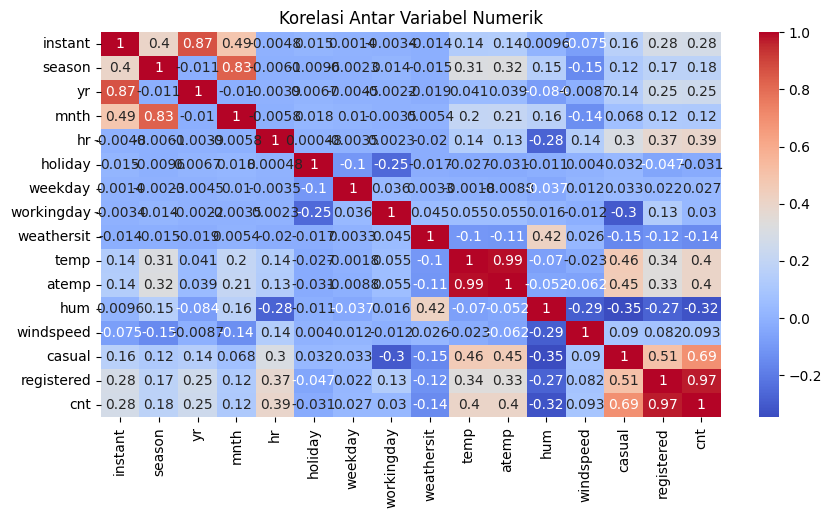

In [ ]:
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel Numerik") # Update title to reflect only numeric variables
plt.show()

**Insight:**
- Terlihat bahwa korelasi antar variabel kuat dan positif, seperti: korelasi varibael temp dan atemp memiliki korelasi positif yang sangat kuat
- Ditemukan juga bahwa adanya korelasi yang lemah atau negatif, seperti: korelasi variabel hum dan windspeed

## Visualization & Explanatory Analysis

### Pertanyaan 1:

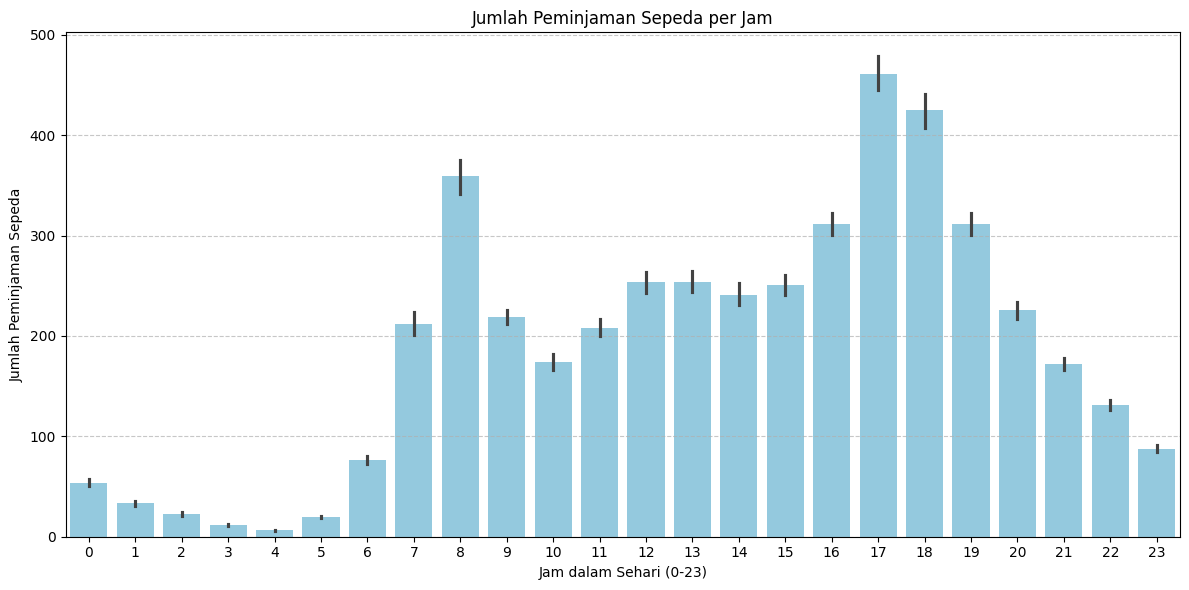

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi jumlah peminjaman per jam
plt.figure(figsize=(12, 6))
sns.barplot(x=df['hr'], y=df['cnt'], color='skyblue')

plt.xlabel("Jam dalam Sehari (0-23)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Jumlah Peminjaman Sepeda per Jam")
plt.xticks(range(0, 24))  # Menampilkan semua label jam (0-23)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid horizontal
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight**
- Dapat diperoleh bahwa peak hour untuk sharing sepeda berada di pukul 8 pagi dan 5 sore
- Untuk di jam terendah berada di pukul 0 - 5 dinihari

### Pertanyaan 2:

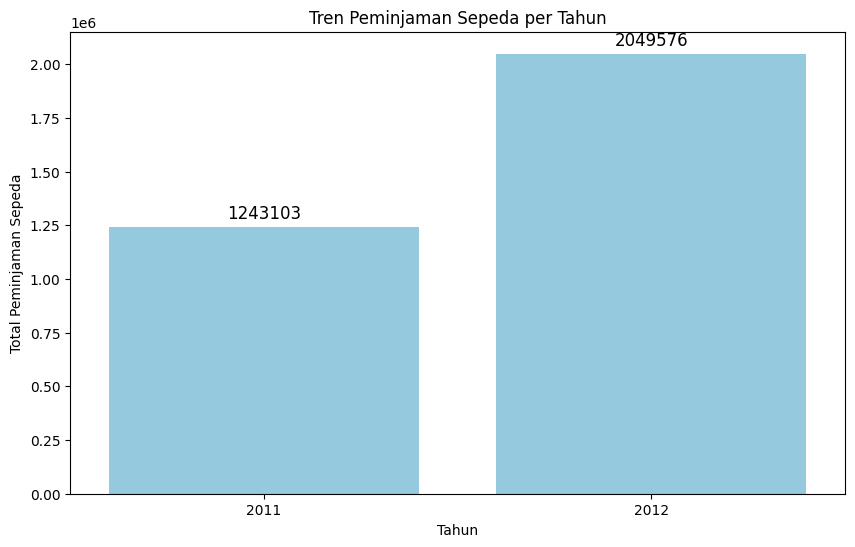

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom 'dteday' ke datetime
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

# Hitung total peminjaman per tahun
yearly_rentals = df.groupby(df['dteday'].dt.year)['cnt'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='dteday', y='cnt', data=yearly_rentals, color='skyblue')

# Menambahkan label di setiap batang
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', fontsize=12, padding=3)

plt.xlabel("Tahun")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda per Tahun")
plt.show()


**Insight:**
- Dapat dilihat dari output diatas, untuk peminjaman sepeda tahun 2011 mencapai hampir 1,25 Juta dan untuk 2012 mencapai lebih dari 2 Juta.
- Ini menunjukkan bahwa setiap tahun mengalami peningkatan yang signifikan

## Analisis Lanjutan (Opsional)

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2